In [1]:
#DIR3122: Computational Fluid Dynamics - Bridget McGibbon
#Step 9: Laplace Equation (with functions)

In [2]:
#define a function to plot the value p over the x and y dimensions 
def plot2d(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100) #figsize sets the size of the figure, dpi sets the resolution
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X, Y, p[:], cmap=cm.viridis) #cmap=cm.viridis gives the graph a colour gradient
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.view_init(20, 200)

In [3]:
#define a function to calculate p until p is at equilibrium (approximately, determined by normtarget)
#x doesn't need to be an argument for these B.C.'s, but I prefer it stylistically
def laplace2d(p, x, y, dx, dy, normtarget):
    norm = 1
    while(norm > normtarget):
        #update pn
        pn = p.copy()
    
        #update p
        p[1:-1, 1:-1] = ((dy**2)*(pn[2:,1:-1]+pn[:-2,1:-1]) + (dx**2)*(pn[1:-1,2:]+pn[1:-1,:-2])) / (2*((dx**2)+(dy**2)))
        
        #maintain boundary conditions
        p[0,:] = 0 #p=0 at x=0
        p[-1,:] = ydim #p=y at x=2
        p[:,0] = p[:,1] 
        p[:,-1] = p[:,-2]
    
        #calculate norm
        norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) / np.sum(np.abs(pn[:])))
    return p

In [4]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
#define variables
nx = 31
dx = 2/(nx-1)

ny = 31
dy = 2/(ny-1)

#create arrays for space dimensions (x is 2 units wide, y is 1 unit wide)
xdim = np.linspace(0,2,nx)
ydim = np.linspace(0,1,ny)

#create 2D array for p
p = np.zeros((nx, ny))
pn = np.zeros((nx, ny))

#set boundary conditions of the x-dimension
p[0,:] = 0 #p=0 at x=0
p[-1,:] = ydim #p=y at x=2

#set boundary conditions of the y-dimension: dp/dy=0 at the boundaries of y
#i.e. the value of p at the boundary is exactly equal to the value of p at a step away from the boundary
p[:,0] = p[:,1] 
p[:,-1] = p[:,-2]

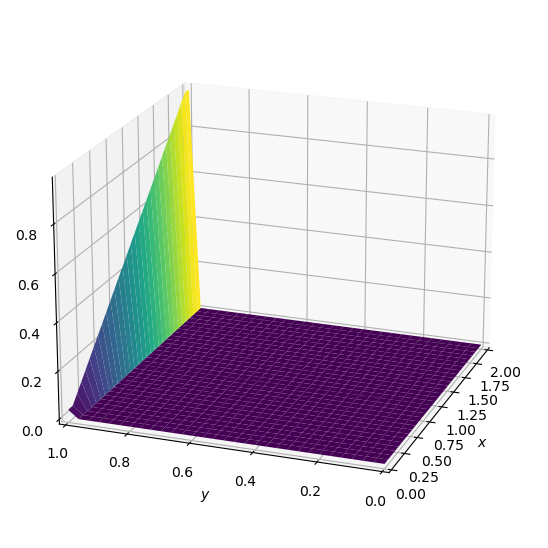

In [6]:
plot2d(xdim, ydim, p)

In [7]:
p = laplace2d(p, xdim, ydim, dx, dy, 1e-4)

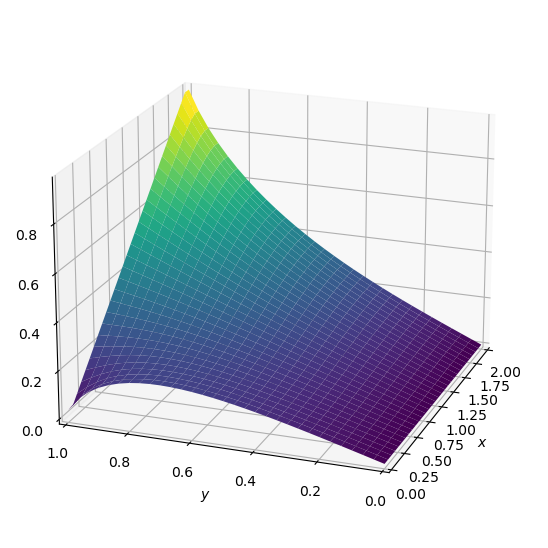

In [8]:
plot2d(xdim, ydim, p)